In [ ]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Spotify_user.csv')
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [ ]:
df.shape #columns and rows

(520, 20)

In [ ]:
df.size # how many entries a dataframe has  (including null entries)
        # number of rows * number of columns

10400

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [ ]:
df.describe() #Descriptive Statistics for numerical variables

,music_recc_rating
count,520.000000
mean,3.503846
std,0.979552
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [ ]:
df.isnull().sum()  # No null values

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(percent_missing)

Age                             0.000000
Gender                          0.000000
spotify_usage_period            0.000000
spotify_listening_device        0.000000
spotify_subscription_plan       0.000000
premium_sub_willingness         0.000000
preffered_premium_plan         40.000000
preferred_listening_content     0.000000
fav_music_genre                 0.000000
music_time_slot                 0.000000
music_Influencial_mood          0.000000
music_lis_frequency             0.000000
music_expl_method               0.000000
music_recc_rating               0.000000
pod_lis_frequency               0.000000
fav_pod_genre                  28.461538
preffered_pod_format           26.923077
pod_host_preference            27.115385
preffered_pod_duration         24.807692
pod_variety_satisfaction        0.000000
dtype: float64


In [ ]:
#Value counts for all variables
for n in df.columns:
    print(df[n].value_counts())

Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64
Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64
spotify_usage_period
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64
spotify_listening_device
Smartphone                                                                              300
Computer or laptop                                                                       54
Smartphone, Computer or laptop                                                           48
Smart speakers or voice assistants                                                       43
Computer or laptop, Smart speakers or voice assistants                                   14
Smartphone, Smart speakers or voice assistants                                           10
Smartphone, Wearable devices                                                              8
Smartphone

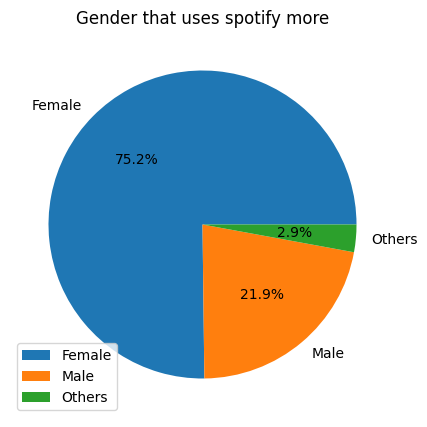

In [ ]:
#Gender % of Spotify Users
y=df['Gender'].value_counts()
plt.figure(figsize=(5,5))
labels=['Female','Male','Others']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Gender that uses spotify more')
plt.show()

<Axes: xlabel='spotify_subscription_plan', ylabel='count'>

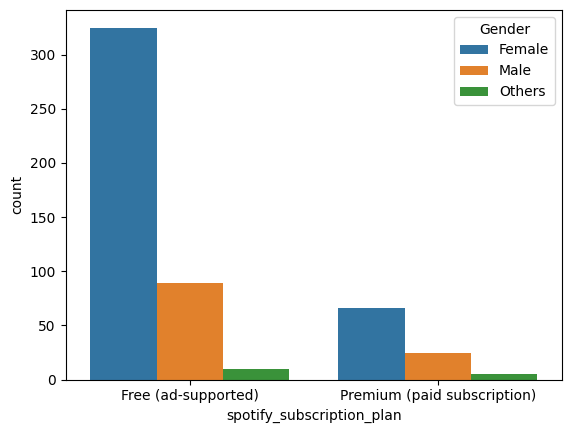

In [ ]:
#Spotify subscription plan by Gender
sns.countplot(x='spotify_subscription_plan',data=df,hue='Gender')

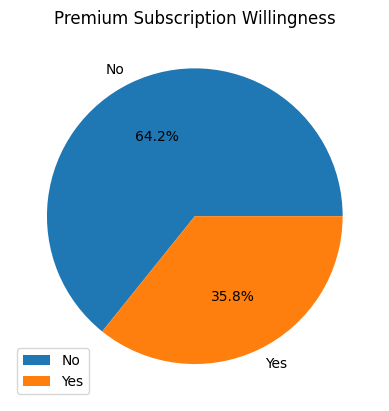

In [ ]:
#Premium Subscription willingness
y3=df['premium_sub_willingness'].value_counts()
labels=['No','Yes']
plt.pie(y3,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Premium Subscription Willingness')
plt.show()

<Axes: xlabel='premium_sub_willingness', ylabel='count'>

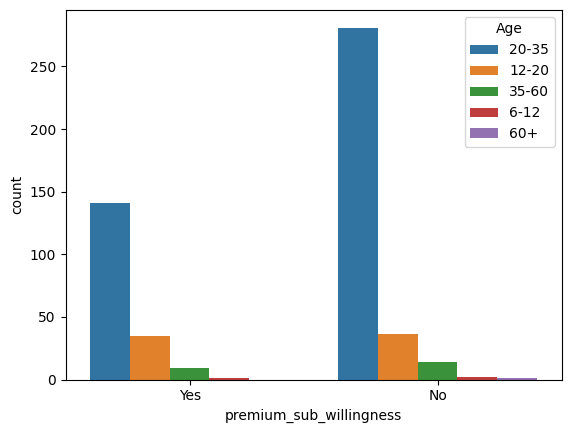

In [ ]:
#Willingness to take subscription by Age
sns.countplot(x='premium_sub_willingness',data=df,hue='Age')

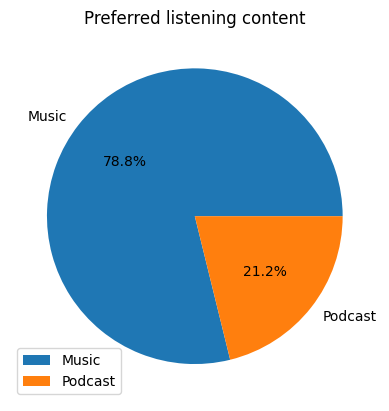

In [ ]:
#Favorite Spotify Content - Music or Podcasts
y3=df['preferred_listening_content'].value_counts()
labels=['Music','Podcast']
plt.pie(y3,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Preferred listening content')
plt.show()

In [ ]:
le=LabelEncoder()
lst=['Age','Gender','spotify_usage_period','spotify_listening_device','spotify_subscription_plan','premium_sub_willingness','preffered_premium_plan','preferred_listening_content','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.isnull().sum()  # No null values

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

<Axes: >

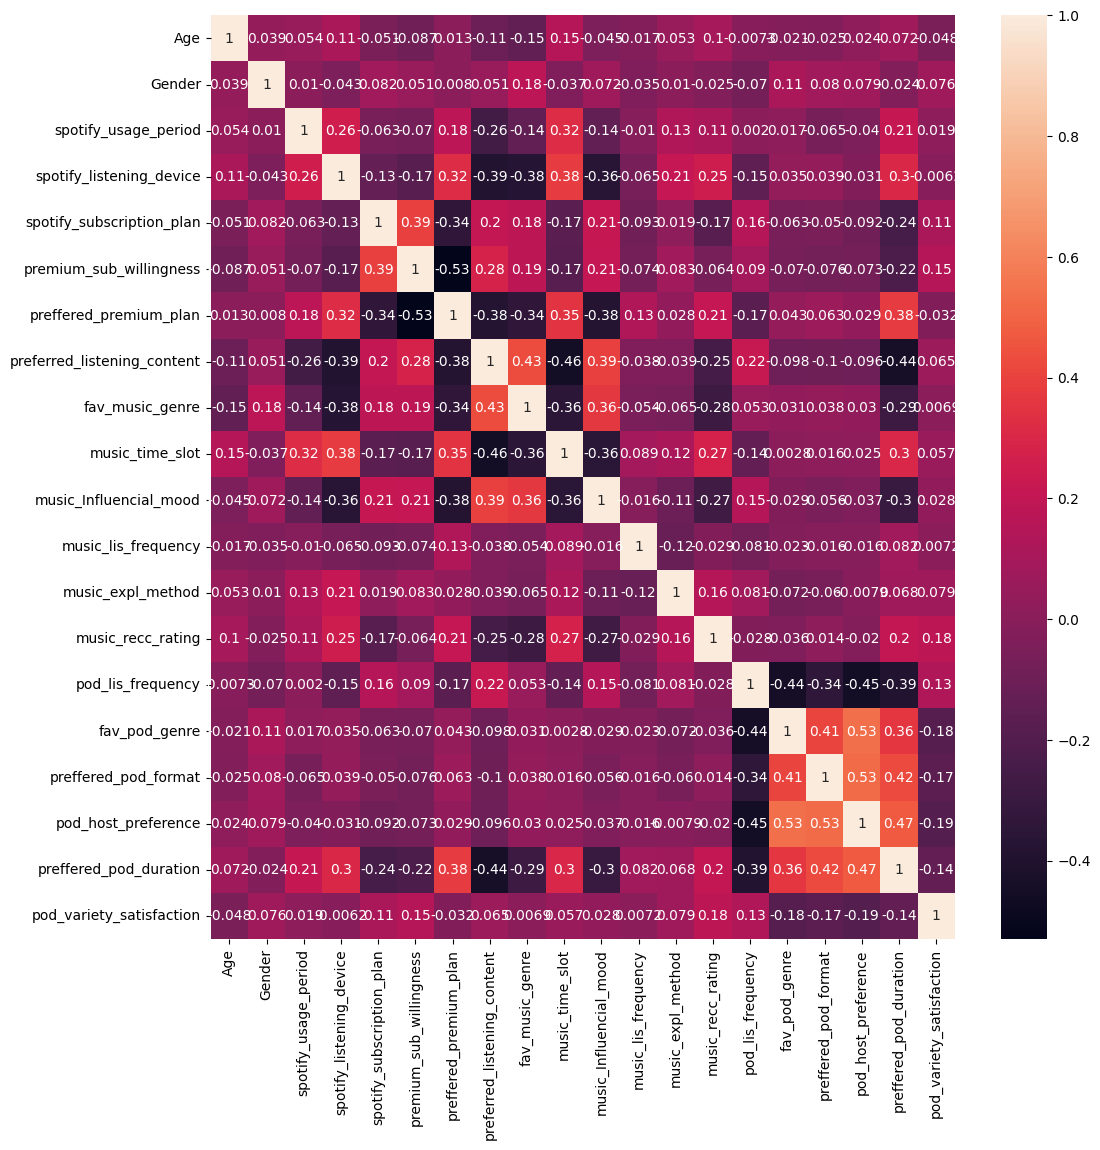

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df_train = pd.read_csv('Spotify_user.csv')
target = 'Age'
df_train.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [ ]:
#Splitting the dataset for chisquare test
X=df.drop(['Age'],axis=1)
y=df['premium_sub_willingness']

In [ ]:
#Splitting the dataset for model building
X1=df.drop(['Age','music_recc_rating','fav_pod_genre','preffered_pod_format','premium_sub_willingness'],axis=1)
y=df['premium_sub_willingness']

In [ ]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(X1)
Xsc

array([[0.        , 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.25      ],
       [0.5       , 1.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [1.        , 0.33333333, 0.28571429, ..., 1.        , 0.        ,
        0.5       ],
       ...,
       [0.        , 1.        , 0.42857143, ..., 0.        , 0.66666667,
        0.25      ],
       [0.        , 0.33333333, 0.42857143, ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 1.        , 0.5       , ..., 1.        , 1.        ,
        0.25      ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape

(416, 15)

In [ ]:
y_train.shape

(416,)

In [ ]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
lr.fit(X_train, y_train)

# Your code to make predictions using the test set goes in here
y_pred = lr.predict(X_test)

# Your code to compute accuracy rate goes in here
accuracy = accuracy_score(y_test, y_pred)
print(accuracy) # do not change this

# Your code to plot a roc curve goes in here
score_Y_lr = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2


0.8173076923076923


<Figure size 640x480 with 0 Axes>

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        66
           1       0.85      0.61      0.71        38

    accuracy                           0.82       104
   macro avg       0.83      0.77      0.79       104
weighted avg       0.82      0.82      0.81       104



0.8173076923076923


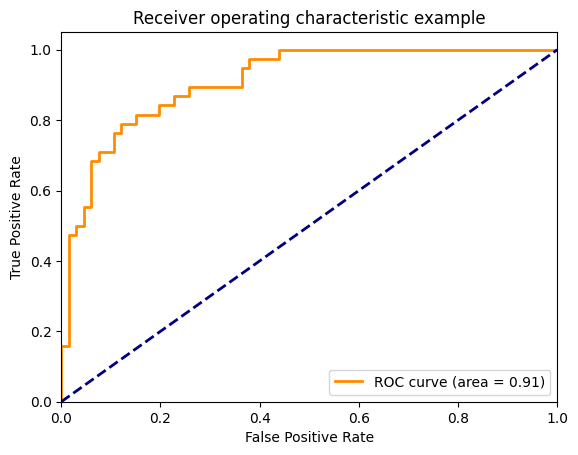

In [ ]:
# Your code to compute accuracy rate goes in here
accuracy = accuracy_score(y_test, y_pred)
print(accuracy) # do not change this
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [ ]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        66
           1       0.84      0.71      0.77        38

    accuracy                           0.85       104
   macro avg       0.85      0.82      0.83       104
weighted avg       0.85      0.85      0.84       104



0.8461538461538461


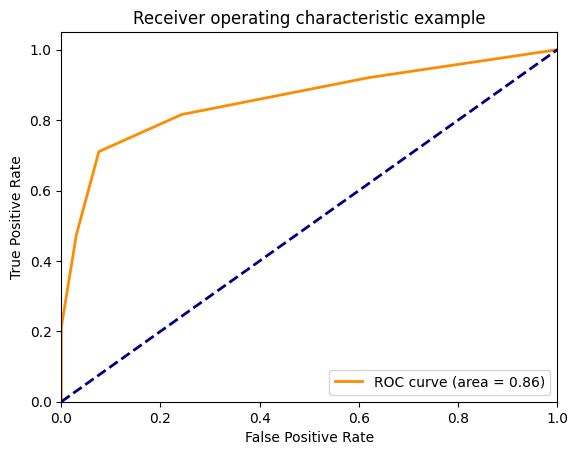

In [ ]:
# Your code to train a 5-nn model goes in here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# Your code to make predictions using the test set goes in here
y_pred = knn.predict(X_test)

# Your code to compute accuracy rate goes in here
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Your code to plot a roc curve goes in here
score_Y_knn = knn.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, score_Y_knn[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [ ]:
#Decision tree
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        66
           1       0.73      0.63      0.68        38

    accuracy                           0.78       104
   macro avg       0.77      0.75      0.75       104
weighted avg       0.78      0.78      0.78       104



0.7692307692307693


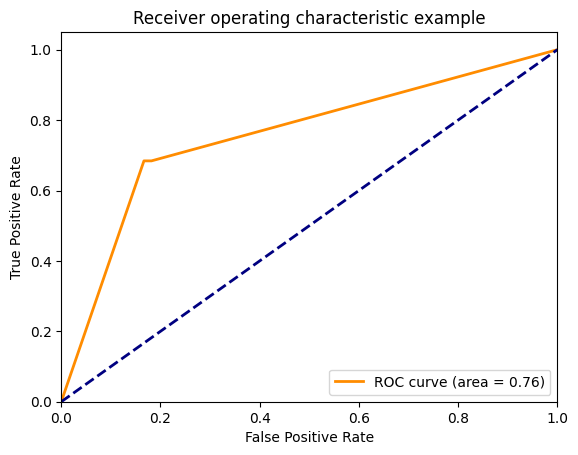

In [ ]:
# Your code to train a decision tree model goes in here
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, y_train)

# Your code to make predictions using the test set goes in here
y_pred = dt.predict(X_test)

# Your code to compute accuracy rate goes in here
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Your code to plot a roc curve goes in here
score_Y_dt = dt.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, score_Y_dt[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [ ]:
#random forest
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        66
           1       0.85      0.74      0.79        38

    accuracy                           0.86       104
   macro avg       0.85      0.83      0.84       104
weighted avg       0.86      0.86      0.85       104



In [ ]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

In [ ]:
# accuracy, sensitivity, aand specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(y_test, pred_y_lr)


# accuracy, sensitivity, aand specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(y_test, pred_y_dt)


# accuracy, sensitivity, aand specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(y_test, pred_y_rf)

# accuracy, sensitivity, aand specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(y_test, pred_y_knn)

In [ ]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn],
                    columns = ['accuracy'],
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt,
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.817308,0.939394,0.605263
Decision Trees,0.769231,0.818182,0.684211
Random Forest,0.855769,0.924242,0.736842
K-NN,0.846154,0.924242,0.710526


In [ ]:
x = df.drop(['spotify_listening_device','Gender','music_lis_frequency','fav_music_genre','spotify_usage_period','preffered_premium_plan','music_Influencial_mood','music_recc_rating','preferred_listening_content','music_time_slot','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction','spotify_subscription_plan'],axis=1)
x

,Age,premium_sub_willingness
0,1,1
1,0,1
2,2,1
3,1,0
4,1,0
...,...,...
515,1,1
516,1,1
517,1,0
518,1,1


In [ ]:
# Fit K-means
from sklearn.cluster import KMeans # import KMeans
model = KMeans(n_clusters = 2) # Creates a KMeans instance where K = 3
model.fit(df) # fits the KMeans using the normalized data
labels = model.labels_ # extracts the classes

In [ ]:
labels + 1 # (classes start from 0 so adding one makes it easier to interpret)

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
df['2-means'] = labels+1 # adds a column showing the class membership values
# to the existing dataframe
df['2-means'].value_counts()# prints the last five records

2-means
1    429
2     91
Name: count, dtype: int64

In [ ]:
df.groupby('2-means').mean().T

2-means,1,2
Age,0.911422,0.989011
Gender,0.277389,0.274725
spotify_usage_period,1.517483,1.725275
spotify_listening_device,5.363636,6.769231
spotify_subscription_plan,0.179487,0.208791
premium_sub_willingness,0.358974,0.351648
preffered_premium_plan,2.589744,2.549451
preferred_listening_content,0.226107,0.142857
fav_music_genre,5.442890,5.186813
music_time_slot,1.363636,1.428571


In [ ]:
X = df.copy()

distortions = []
for k in range(1, 10): # we will fit multple k-means (from k = 2 to k = 30)
    kmeans = KMeans(n_clusters=k) # creates a k-means instance
    kmeans.fit(X) # fits k-means
    distortions.append(kmeans.inertia_)

In [ ]:
distortions

[102986.59038461544,
 67111.30003330001,
 51458.93435256179,
 43708.356776702334,
 40139.04017375762,
 37236.714427668674,
 35123.11335053152,
 32513.041497190945,
 31586.7360722015]

Text(0.5, 1.0, 'Elbow curve')

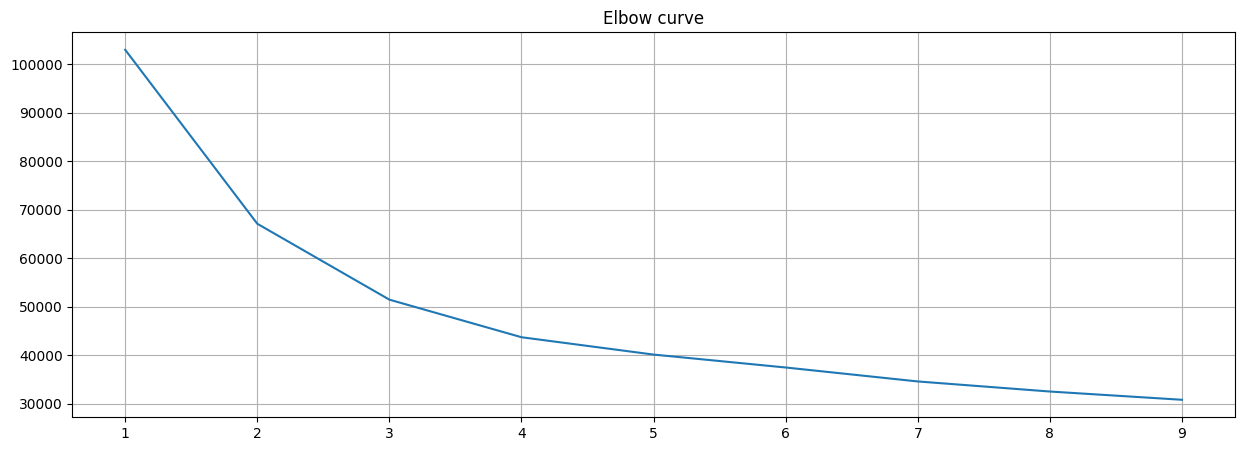

In [ ]:
X = df.copy() #copy the normalized_df and save it to a variable named X

distortions = [] #create an empty list named distorsions
for k in range(1, 10): # we will fit multple k-means (from k = 2 to k = 30)
    kmeans = KMeans(n_clusters=k) # creates a k-means instance
    kmeans.fit(X) # fits k-means
    distortions.append(kmeans.inertia_) # saves the distorsions

fig = plt.figure(figsize=(15, 5)) # create a figure space with a given figure size
plt.plot(range(1, 10), distortions) #  # plot the distorsions
plt.grid(True) # inserts grids
plt.title('Elbow curve') # title the plot
# This curve helps us determine the number of clusters (somehow optimally)

In [ ]:
#Fit K-means
model = KMeans(n_clusters = 3)
model.fit(df) # fits the model
labels = model.labels_ #extracts the class labels

In [ ]:
df['optimum_clusters'] = labels+1 # for easy interpretation, adding 1 to class labels
df['optimum_clusters'].value_counts()

optimum_clusters
1    264
2    166
3     90
Name: count, dtype: int64

In [ ]:
df.groupby('optimum_clusters').mean().T

optimum_clusters,1,2,3
Age,0.920455,0.897590,0.988889
Gender,0.223485,0.361446,0.277778
spotify_usage_period,1.492424,1.560241,1.722222
spotify_listening_device,5.189394,5.644578,6.777778
spotify_subscription_plan,0.204545,0.138554,0.211111
premium_sub_willingness,0.397727,0.295181,0.355556
preffered_premium_plan,2.500000,2.740964,2.533333
preferred_listening_content,0.272727,0.150602,0.144444
fav_music_genre,5.450758,5.421687,5.200000
music_time_slot,1.337121,1.409639,1.422222
